# RSA DDL 2022:  Using Jupyter Notebooks and Pandas to Work with Data

Richard Freedman (Haverford College)<br>
rfreedma@haverford.edu  <br>
https://orcid.org/0000-0001-5550-3674 <br>

Daniel Russo-Batterham (The University of Melbourne) <br>
daniel.russo@unimelb.edu.au <br>
https://orcid.org/0000-0001-7550-528X <br>


## A. Introduction


* **Jupyter Notebooks** allow anyone to run **Python** code in any browser, without the need to use the terminal or command line

* **Jupyter Notebooks** are organized as 'cells', which can be **commentary** (like this one, which is static), or **code** (those below, which produce dyanmic output in the form of charts or tabular data frames.  

* To run an individual cell, use the **`arrow/run`** command at the top of the Notebook, or just press **`Shift + Enter`** on your keyboard.


### A.1 Import Libraries

Before we can do anything we need to import the python tools we need:

* **pandas** is the main library
* **matplot** will help us render graphs and charts
* **folium** will help us with GIS and maps
* there are dozens of other standard libraries; if they work with Python, they will work with Jupyter and Pandas

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import folium
import numpy as np
from datetime import datetime

### A.2  URLs of our Data Sets

In [2]:
emblematica_books = "data_files/bookObjects.csv"
emblematica_emblems = "data_files/emblemObjects.csv"
decima_data = "data_files/Decima_data.csv"
bartoli_letters = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRhB4rw1W7DMgO8EEn8jhvRVuIGe-NvcTVMSwCXKxZQ3_B8LUB8OmLhMKAbFap8K3VqcfEQxG8ZKYvq/pub?output=csv'

du_chemin_poems = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRrNA-LgA5pyIIB-FPDuIBU5eZy6dnL5WHHIkRDJIhi-G9fZPemaa6s8h_bNKg5mSx6yi7gFYdIk64w/pub?output=csv'

compagnie_data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRSKiDNpqPfMPLcLz-W6amuDsVZabZuFWqcrpiXNVsZecxRKlFCkoFlCGYkm5YVJaKllH9HWV3FvO-V/pub?output=csv'

### A.3  Make a DataFrame

* The basic unit of work in Pandas is the DataFrame (a table representing the data as columns (with the headings from our CSV files) and rows.
* The left-hand column is called the `index`.  Here it's simply a number, but we can change that.  **NB**:  index starts at "0"!

**Create a DataFrame** by importing one of the CSV files.  We'll also give the frame a name (`books`):

In [37]:
books = pd.read_csv(emblematica_books)

### A.4 Inspect the DataFrame

Now we can look at the data in various ways to see what's here:

* `books.head()` shows us just the first five entries (for brevity).  
* We could also see `books.tail()`, or `books.sample(5)` to see a random sample of five.
* `books.shape` will tell us the size of our frame:  how many rows and columns



In [38]:
books.tail()

,Book_ID,URL_for_Book_Details,Book_Title,Publication_Date,Publisher,Place_of_Publication,Author_1,Author_2,Author_3,Author_4,Author_5,Contributor_1,Contributor_2,Contributor_3
43,57042755X,http://emblematica.library.illinois.edu/detail...,"Aulæa Romana, Contra Peristromata Turcica Expa...",1642,Endter,Nürnberg,"Harsdörffer, Georg Philipp",NaN,NaN,NaN,NaN,"Endter, Wolfgang <der Ältere>",NaN,NaN
44,373960859,http://emblematica.library.illinois.edu/detail...,Geistliche Hertzens-Einbildungen Inn Zweihunde...,1692,Bodenehr,Augstburg,NaN,NaN,NaN,NaN,NaN,"Melchior@Mattsperger, Melchior","Bodenehr, Hannß Georg","Bodenehr, Johann Georg"
45,379509814,http://emblematica.library.illinois.edu/detail...,"Iodoci Ammanni, Civis Noribergensis. Charta Lv...",1588,Heußler,Nürnberg,"Ammannus, Jodocus",NaN,NaN,NaN,NaN,"Schröterus, Janus Heinricus","Heußler, Leonhard",NaN
46,872516830,http://emblematica.library.illinois.edu/detail...,Dreiständige Sinnbilder: Zu Fruchtbringendem N...,1643,Buno,Braunschweig,"Geheime, Der",NaN,NaN,NaN,NaN,"Nährende, Der <Anhalt-Köthen, Fürst>","Unverdrossene, Der","Suchende, Der"
47,537816240,http://emblematica.library.illinois.edu/detail...,Fruchtbringenden Geselschaft Nahmen/ Vorhaben/...,1646,Merian,Franckfurt am Mayn,"Ludwig <Anhalt-Köthen, Fürst>",NaN,NaN,NaN,NaN,"Merian, Matthäus <der Ältere>","Merian, Matthaeus <der Ältere>",NaN


Overall size of our dataframe:

In [39]:
books.shape

(48, 14)

#### We found some duplicate books, so let's drop one of those

In [40]:
books = books.drop_duplicates()
books.shape

(47, 14)

## B. Working with Column Data

### B.1 Get Columns and Values

* We now start to look more closely the columns
* `books.columns` will give us a list of the column names
* `books.columns.sort_values()`
* Select one:  `books["Place_of_Publication"]`
* Count the number of unique values: `books["Place_of_Publication"].nunique()`
* Count the number of entries for each value:  `books["Place_of_Publication"].value_counts()`

#### We can list out the columns like this:

In [41]:
books.columns

Index(['Book_ID', 'URL_for_Book_Details', 'Book_Title', 'Publication_Date',
       'Publisher', 'Place_of_Publication', 'Author_1', 'Author_2', 'Author_3',
       'Author_4', 'Author_5', 'Contributor_1', 'Contributor_2',
       'Contributor_3'],
      dtype='object')

#### And put them in alphabetical order

In [42]:
books.columns.sort_values()

Index(['Author_1', 'Author_2', 'Author_3', 'Author_4', 'Author_5', 'Book_ID',
       'Book_Title', 'Contributor_1', 'Contributor_2', 'Contributor_3',
       'Place_of_Publication', 'Publication_Date', 'Publisher',
       'URL_for_Book_Details'],
      dtype='object')

#### An individual column is represented as a "Series"

In [43]:
books["Place_of_Publication"]

0                          Nurembergµ
1                           Osnabrugi
2                             Lovanii
3                             A Paris
4                            Augspurg
5               Francofurti ad Moenum
6                          Nuremberg?
7                            Bononiae
8                            Nürnberg
9                         Francofurti
10                         Heidelberg
11                           Augspurg
13                           Augspurg
14                          Saltzburg
15                        Heidelbergæ
16                             London
17                           Coloniae
18                          Bruxellae
19                             Leiden
20                          Amsterdam
21                            Lugduni
22                               Lyon
23    Impresso en la ciudad de Najera
24                            Patauij
25       Excvsvm Avgvstæ Vindelicorum
26       Excvsvm Avgvstæ Vindelicorum
27      Excv

In [44]:
books["Place_of_Publication"].nunique()

39

#### We get a count of the places of publication as follows. Note, however, the subtle orthographical differences:

In [45]:
books["Place_of_Publication"].value_counts()

Nürnberg                           3
Augspurg                           3
Excvsvm Avgvstæ Vindelicorum       2
Parisiis                           2
A Lyon                             2
Lvgd                               2
London                             1
Nurembergµ                         1
En Lyon                            1
Lvgdvni Batavorvm                  1
On les vend a Paris                1
Patauij                            1
Paris                              1
Coloniae                           1
Bononiae                           1
Lyon                               1
Heidelberg                         1
Francofurti ad Moenum              1
Franckfurt am Mayn                 1
Francofurti                        1
Bruxellae                          1
Amsterdam                          1
Gedruckt zu Franckfurt am Mayn     1
On les uend à Paris                1
Nuremberg?                         1
Lugduni                            1
A Paris                            1
E

___

### B.2  What about all those Author columns?

* Notice that in the *Emblematica* data that an individual book can have more than one author.  Each is in a different column


In [46]:
books.head()

,Book_ID,URL_for_Book_Details,Book_Title,Publication_Date,Publisher,Place_of_Publication,Author_1,Author_2,Author_3,Author_4,Author_5,Contributor_1,Contributor_2,Contributor_3
0,emblematapolitic00isel,http://emblematica.library.illinois.edu/detail...,Emblemata politica: in aula magna Curiµ Norinb...,1617,NaN,Nurembergµ,"Iselberg, Peter, ca. 1568-ca. 1630","Remus, Georg, 1561-1625",NaN,NaN,NaN,NaN,NaN,NaN
1,645803367,http://emblematica.library.illinois.edu/detail...,Iter parallelum Phoebi Occidentis & Orientis J...,1680,Schwänderus,Osnabrugi,NaN,NaN,NaN,NaN,NaN,"Johann Friedrich <Braunschweig-Lüneburg, Herzog>","Ernst August <Hannover, Kurfürst, I.>",Löffler <Junior>
2,635971542,http://emblematica.library.illinois.edu/detail...,Annvs Positionvm Mathematicarvm,1641,Collegium Societatis Jesu,Lovanii,"Ciermans, Joannes","Unverzagt de Ebenfurt, Wolfgangus Philippus Ja...",NaN,NaN,NaN,"Ferdinandus <Imperator, II>","Mandekens, Mart.","Neeffs, Jacobus"
3,devisesheroiques00parad,http://emblematica.library.illinois.edu/detail...,"Devises heroiques, et emblemes",1614,Chez Jean Millot ...,A Paris,"Paradin, Claude, 16th cent","Amboise, Franðcois d', 1550-1620",NaN,NaN,NaN,NaN,NaN,NaN
4,386577072,http://emblematica.library.illinois.edu/detail...,Kunst-Göttin Minerva Liebreiche Entdeckung/ Wi...,1704,Kröninger,Augspurg,"Ripa, Cesare",NaN,NaN,NaN,NaN,"Kroniger, Lorenz",Gottlieb Göbel Erben,NaN


#### Using Python's capacity to understand `lists`, we can find just these columns:

In [47]:
author_columns = [c for c in books.columns if c.startswith("Author")]
author_columns

['Author_1', 'Author_2', 'Author_3', 'Author_4', 'Author_5']

In [48]:
books[author_columns].head()

,Author_1,Author_2,Author_3,Author_4,Author_5
0,"Iselberg, Peter, ca. 1568-ca. 1630","Remus, Georg, 1561-1625",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,"Ciermans, Joannes","Unverzagt de Ebenfurt, Wolfgangus Philippus Ja...",NaN,NaN,NaN
3,"Paradin, Claude, 16th cent","Amboise, Franðcois d', 1550-1620",NaN,NaN,NaN
4,"Ripa, Cesare",NaN,NaN,NaN,NaN


#### And now 'stack' the values for all these columns into one **Series**

In [49]:
books[author_columns].stack()

0   Author_1                   Iselberg, Peter, ca. 1568-ca. 1630
    Author_2                              Remus, Georg, 1561-1625
2   Author_1                                    Ciermans, Joannes
    Author_2    Unverzagt de Ebenfurt, Wolfgangus Philippus Ja...
3   Author_1                           Paradin, Claude, 16th cent
                                      ...                        
42  Author_4               Tournes, Jean de, II, active 1568-1584
43  Author_1                           Harsdörffer, Georg Philipp
45  Author_1                                    Ammannus, Jodocus
46  Author_1                                         Geheime, Der
47  Author_1                        Ludwig <Anhalt-Köthen, Fürst>
Length: 72, dtype: object

#### And count the items in the stacked set

In [50]:
books[author_columns].stack().value_counts()

Alciati, Andrea, 1492-1550                              21
Aneau, Barthélemy, -1561                                 4
Lefèvre, Jean, 1493-1565                                3
Breu, Jörg, approximately 1480-1537                      3
Mignault, Claude, approximately 1536-1606                2
Weiditz, Hans, approximately 1495-approximately 1536     2
Stockhammer, Sebastian, sec. XVI                         2
Rollenhagen, Gabriel, 1583-1619?                         1
Remus, Georg, 1561-1625                                  1
Ripa, Cesare                                             1
Ludwig <Anhalt-Köthen, Fürst>                            1
Iselberg, Peter, ca. 1568-ca. 1630                       1
Camerarius, Joachim                                      1
Amboise, Franðcois d', 1550-1620                         1
Elger, Willem den                                        1
Meisner, Daniel                                          1
Harsdörffer, Georg Philipp                              

#### All the authors, sorted alphbetically as a list

In [51]:
sorted(books[author_columns].stack().unique())

['Alciati, Andrea, 1492-1550',
 "Amboise, Franðcois d', 1550-1620",
 'Ammannus, Jodocus',
 'Aneau, Barthélemy, -1561',
 'Astry, James, Sir',
 'Batillius, Dionysius Lebeus',
 'Breu, Jörg, approximately 1480-1537',
 'Camerarius, Joachim',
 'Ciermans, Joannes',
 'Cremcovius, Valens.',
 'Daza Pinciano, Bernardino.',
 'Elger, Willem den',
 'Feuille, Daniel de la',
 'Geheime, Der',
 'Harsdörffer, Georg Philipp',
 'Held, Jeremias.',
 'Hunger, Wolffgang, 1511-1555',
 'Iselberg, Peter, ca. 1568-ca. 1630',
 'Lefèvre, Jean, 1493-1565',
 'Ludwig <Anhalt-Köthen, Fürst>',
 'López, Diego, ?-1655',
 'Maccius, Paulus',
 'Marquale, Giovanni.',
 'Meisner, Daniel',
 'Mignault, Claude, approximately 1536-1606',
 'Morel, Fédéric, approximately 1552-1630',
 'Ovidius Naso, Publius',
 'Paradin, Claude, 16th cent',
 'Pignoria, Lorenzo, 1571-1631',
 'Remus, Georg, 1561-1625',
 'Ripa, Cesare',
 'Rollenhagen, Gabriel, 1583-1619?',
 'Saavedra-Fajardo, Diego de, 1584-1648',
 'Stockhammer, Sebastian, sec. XVI',
 '

### B.3 See if you can get a list of contributors 

It is very similar to the process above:

In [52]:
books.columns

Index(['Book_ID', 'URL_for_Book_Details', 'Book_Title', 'Publication_Date',
       'Publisher', 'Place_of_Publication', 'Author_1', 'Author_2', 'Author_3',
       'Author_4', 'Author_5', 'Contributor_1', 'Contributor_2',
       'Contributor_3'],
      dtype='object')

___

## C.  Charts and Graphs

* Through libraries like **matplot**, Pandas can quickly produce histograms, charts, and graphs of various kinds (these can even be saved as PNG files for publications)

In [53]:
books["Publication_Date"].sort_values()

26    1531
25    1531
28    1534
27    1534
40    1536
29    1539
30    1542
31    1542
41    1549
32    1549
33    1550
39    1551
34    1551
22    1552
21    1552
35    1556
36    1558
37    1566
45    1588
38    1591
5     1596
10    1605
17    1611
9     1614
3     1614
23    1615
42    1615
0     1617
24    1621
18    1624
7     1628
2     1641
43    1642
46    1643
47    1646
15    1666
1     1680
14    1685
20    1691
44    1692
13    1695
11    1695
6     1700
16    1700
8     1700
19    1703
4     1704
Name: Publication_Date, dtype: int64

#### Here can create histograms of the distribution of the years of publication, and sort them into however many 'bins' we like

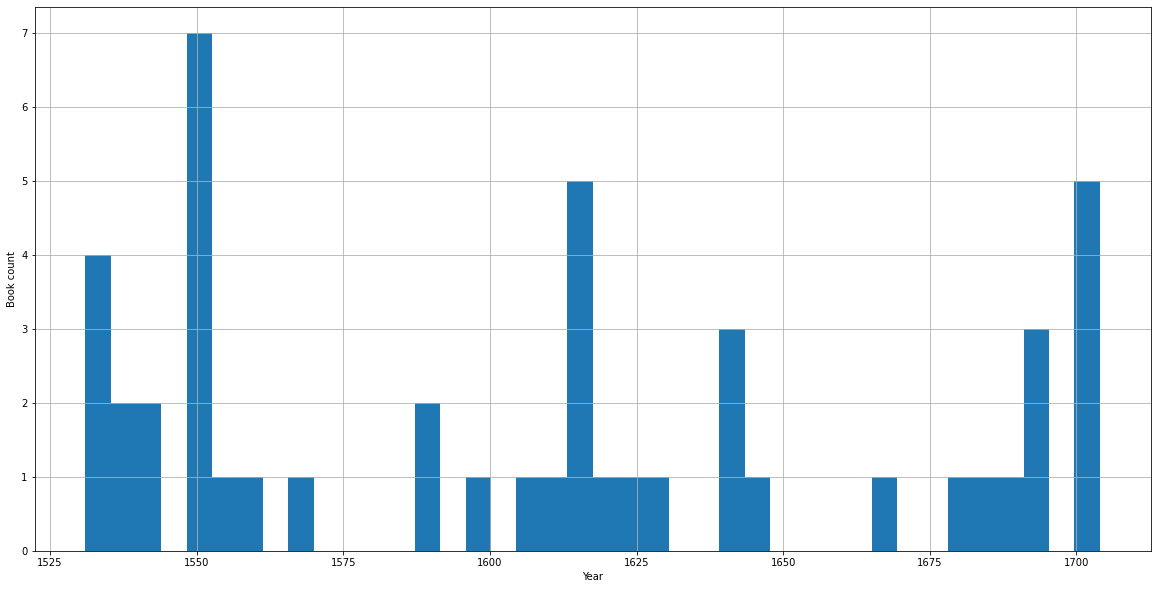

In [56]:
books["Publication_Date"].hist(figsize=(20, 10), bins=40)
plt.xlabel("Year")
plt.ylabel("Book count")
plt.show()

#### Various built-in math functions allow us to run basic statistics.  Libraries like `numpy` permit many more!

In [57]:
books.Publication_Date.mean()

1609.468085106383

___

## D.  More Work with Columns

### D.1 Load the Emblem CSV

In [62]:
emblems = pd.read_csv(emblematica_emblems)

In [63]:
emblems.sample(5)

,Emblem_ID,URL_for_Emblem_Details,URL_for_Emblem_Thumbnail,Emblem_Motto,Publication_Date,URL_for_Pictura,Iconclass_Heading_1,Iconclass_Heading_2,Iconclass_Heading_3,Iconclass_Heading_4,Iconclass_Heading_5,Iconclass_Heading_6,Iconclass_Heading_7,From Collection,Published_In,URL_for_Book_Details
100,E033212,http://emblematica.library.illinois.edu/detail...,http://emblemimages.library.illinois.edu/57042...,Fera nuncia martis. Meliori pervia causae. Mon...,1642,http://emblemimages.library.illinois.edu/57042...,NaN,"45A10 symbols, allegories of war; 'Guerra' (Ripa)","45A20 symbols, allegories of peace, 'Pax'; 'Pa...",25G3(PALM-TREE) trees: palm-tree,25C11 eruption (of volcano),51G5 Visibility,"56F11 Ambition; 'Ambitione', 'Amor di Fama' (R...",NaN,57042755X,http://emblematica.library.illinois.edu/detail...
107,E048799,http://emblematica.library.illinois.edu/detail...,http://emblemimages.library.illinois.edu/37950...,NaN,1588,http://emblemimages.library.illinois.edu/37950...,"41C322 mug, beaker, goblet","25G41(LILY)(+32) flowers: lily (+ flowers, blo...",45C13(SWORD) hacking and thrusting weapons: sword,45H34 single combat in place of battle,11N31 Pride; 'Superbia' (Ripa) ~ personificati...,11N34 Covetousness; 'Avaritia' (Ripa) ~ person...,51D42 Splendour,NaN,379509814,http://emblematica.library.illinois.edu/detail...
4,E003756,http://emblematica.library.illinois.edu/detail...,http://emblemimages.library.illinois.edu/63597...,Maii. Hebdomas Tertia.,1641,http://emblemimages.library.illinois.edu/63597...,"86(MAII. HEBDOMAS TERTIA) proverbs, sayings, e...","92D1916 cupids: 'amores', 'amoretti', 'putti'",49D5111 compasses,49D511(RULER) drawing-instruments: ruler,45F11 plan of battle,"45A10 symbols, allegories of war; 'Guerra' (Ripa)",33B10 'Lite' (Ripa),NaN,635971542,http://emblematica.library.illinois.edu/detail...
66,E029581,http://emblematica.library.illinois.edu/detail...,http://emblemimages.library.illinois.edu/A31b/...,EX BELLO PAX.,1531,http://emblemimages.library.illinois.edu/A31b/...,"25F711(BEE)(+53) insects: bee (+ postures, pos...",31A22611 blood,45A1 war,"45A10 symbols, allegories of war; 'Guerra' (Ripa)",45A2 peace,"45A20 symbols, allegories of peace, 'Pax'; 'Pa...",45A231 blessings of peace,NaN,A31b,http://emblematica.library.illinois.edu/detail...
36,E015751,http://emblematica.library.illinois.edu/detail...,http://emblemimages.library.illinois.edu/devis...,Welches unter beyden man verlanget.,1695,http://emblemimages.library.illinois.edu/devis...,25G3(OLIVE-TREE)(+22) trees: olive-tree (+ bra...,"25H1124 boulder, stone","45A10 symbols, allegories of war; 'Guerra' (Ripa)","45A20 symbols, allegories of peace, 'Pax'; 'Pa...",45C12(CLUB) weapons for striking a blow: club,53A11(+4) Choice; 'Elettione' (Ripa) (+ emblem...,"86(UTRUM LIBET) proverbs, sayings, etc. (UTRUM...",NaN,devisesetembleme00augs,http://emblematica.library.illinois.edu/detail...


### D.2  Dropping Columns

* The *From Collection* column is completely empty (see the `NaN` values), so how about we drop it from our DataFrame. 
* We will also drop the **URL** columns to reduce the size of the DataFrame.



In [64]:
emblems = emblems.drop(columns=["From Collection", "URL_for_Emblem_Details", "URL_for_Emblem_Thumbnail", "URL_for_Pictura"])
emblems.head()

,Emblem_ID,Emblem_Motto,Publication_Date,Iconclass_Heading_1,Iconclass_Heading_2,Iconclass_Heading_3,Iconclass_Heading_4,Iconclass_Heading_5,Iconclass_Heading_6,Iconclass_Heading_7,Published_In,URL_for_Book_Details
0,E000913,In pace quae belli sunt.,1617,"25F23(FOX)(+535) beasts of prey, predatory ani...",25F24(BOAR)(+5211) hoofed animals: boar (+ wal...,25G3 trees,"45A10 symbols, allegories of war; 'Guerra' (Ripa)","45A20 symbols, allegories of peace, 'Pax'; 'Pa...",45A132 preparation for war,54D1(+4) Preparation (+ emblematical represent...,emblematapolitic00isel,http://emblematica.library.illinois.edu/detail...
1,E003060,Erigit impavidum ruina.,1680,"86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings, ...","54F12 Luck, Fortune, Lot; 'Fato', 'Fortuna', '...",46C1442 four-wheeled vehicle drawn by two animals,"45A10 symbols, allegories of war; 'Guerra' (Ripa)","33A12 shaking hands, 'dextrarum junctio'",31D14 adult man,46C13141 horse,645803367,http://emblematica.library.illinois.edu/detail...
2,E003754,Maii. Hebdomas Prima.,1641,"86(MAII. HEBDOMAS PRIMA) proverbs, sayings, et...","92D1916 cupids: 'amores', 'amoretti', 'putti'",41A1911 tent-camp,"47D8(HAMMER) tools, aids, implements ~ crafts ...",47C41 gripping (industrial process),"45A10 symbols, allegories of war; 'Guerra' (Ripa)",23I22 May; 'Maggio' (Ripa),635971542,http://emblematica.library.illinois.edu/detail...
3,E003755,Maii. Hebdomas Secunda.,1641,"86(MAII. HEBDOMAS SECUNDA) proverbs, sayings, ...","92D1916 cupids: 'amores', 'amoretti', 'putti'",46C13187 leading a horse by the reins; rider b...,45C22 armour,45H3 battle,33B10 'Lite' (Ripa),"45A10 symbols, allegories of war; 'Guerra' (Ripa)",635971542,http://emblematica.library.illinois.edu/detail...
4,E003756,Maii. Hebdomas Tertia.,1641,"86(MAII. HEBDOMAS TERTIA) proverbs, sayings, e...","92D1916 cupids: 'amores', 'amoretti', 'putti'",49D5111 compasses,49D511(RULER) drawing-instruments: ruler,45F11 plan of battle,"45A10 symbols, allegories of war; 'Guerra' (Ripa)",33B10 'Lite' (Ripa),635971542,http://emblematica.library.illinois.edu/detail...


#### We found a duplicate book entry (1695) so let's drop it here

### D.3 Exploring the IconClass Data:  Combining the Tags

* Emblematica Online uses the Iconclass vocabularies to classify the images.
* Each emblem can have more than one classification number, and these are stored in separate columns
* Let's: 
 - **find those Iconclass columns** and then 
 - **remove the NaN values** in any cells and then
 - put all the values for each icon in a single cell **'iconclasses'**

 #### More about [Iconclass](http://www.iconclass.org/help/outline)

In [65]:
icon_columns = [c for c in emblems.columns if c.startswith("Iconclass")]
icon_columns

['Iconclass_Heading_1',
 'Iconclass_Heading_2',
 'Iconclass_Heading_3',
 'Iconclass_Heading_4',
 'Iconclass_Heading_5',
 'Iconclass_Heading_6',
 'Iconclass_Heading_7']

In [66]:
emblems["iconclasses"] = (
    emblems[icon_columns]
        .fillna("")
        .apply(lambda x: [el for el in x if el], axis="columns")
)
emblems["iconclasses"]

0      [25F23(FOX)(+535) beasts of prey, predatory an...
1      [86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings,...
2      [86(MAII. HEBDOMAS PRIMA) proverbs, sayings, e...
3      [86(MAII. HEBDOMAS SECUNDA) proverbs, sayings,...
4      [86(MAII. HEBDOMAS TERTIA) proverbs, sayings, ...
                             ...                        
108    [86(WER DIESES NIMT IN ACHT) proverbs, sayings...
109    [86(DEN MUND SCHLEUS ZU) proverbs, sayings, et...
110    [86(FRIED UNS ERHELT) proverbs, sayings, etc. ...
111    [86(SO RÜST' ICH MICH) proverbs, sayings, etc....
112    [86(DER DREYEN EINES., DER BEDEUTENDE) proverb...
Name: iconclasses, Length: 113, dtype: object

In [71]:
emblems.head()

,Emblem_ID,Emblem_Motto,Publication_Date,URL_for_Pictura,Iconclass_Heading_1,Iconclass_Heading_2,Iconclass_Heading_3,Iconclass_Heading_4,Iconclass_Heading_5,Iconclass_Heading_6,Iconclass_Heading_7,Published_In,URL_for_Book_Details,iconclasses
0,E000913,In pace quae belli sunt.,1617,http://emblemimages.library.illinois.edu/emble...,"25F23(FOX)(+535) beasts of prey, predatory ani...",25F24(BOAR)(+5211) hoofed animals: boar (+ wal...,25G3 trees,"45A10 symbols, allegories of war; 'Guerra' (Ripa)","45A20 symbols, allegories of peace, 'Pax'; 'Pa...",45A132 preparation for war,54D1(+4) Preparation (+ emblematical represent...,emblematapolitic00isel,http://emblematica.library.illinois.edu/detail...,"[25F23(FOX)(+535) beasts of prey, predatory an..."
1,E003060,Erigit impavidum ruina.,1680,http://emblemimages.library.illinois.edu/64580...,"86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings, ...","54F12 Luck, Fortune, Lot; 'Fato', 'Fortuna', '...",46C1442 four-wheeled vehicle drawn by two animals,"45A10 symbols, allegories of war; 'Guerra' (Ripa)","33A12 shaking hands, 'dextrarum junctio'",31D14 adult man,46C13141 horse,645803367,http://emblematica.library.illinois.edu/detail...,"[86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings,..."
2,E003754,Maii. Hebdomas Prima.,1641,http://emblemimages.library.illinois.edu/63597...,"86(MAII. HEBDOMAS PRIMA) proverbs, sayings, et...","92D1916 cupids: 'amores', 'amoretti', 'putti'",41A1911 tent-camp,"47D8(HAMMER) tools, aids, implements ~ crafts ...",47C41 gripping (industrial process),"45A10 symbols, allegories of war; 'Guerra' (Ripa)",23I22 May; 'Maggio' (Ripa),635971542,http://emblematica.library.illinois.edu/detail...,"[86(MAII. HEBDOMAS PRIMA) proverbs, sayings, e..."
3,E003755,Maii. Hebdomas Secunda.,1641,http://emblemimages.library.illinois.edu/63597...,"86(MAII. HEBDOMAS SECUNDA) proverbs, sayings, ...","92D1916 cupids: 'amores', 'amoretti', 'putti'",46C13187 leading a horse by the reins; rider b...,45C22 armour,45H3 battle,33B10 'Lite' (Ripa),"45A10 symbols, allegories of war; 'Guerra' (Ripa)",635971542,http://emblematica.library.illinois.edu/detail...,"[86(MAII. HEBDOMAS SECUNDA) proverbs, sayings,..."
4,E003756,Maii. Hebdomas Tertia.,1641,http://emblemimages.library.illinois.edu/63597...,"86(MAII. HEBDOMAS TERTIA) proverbs, sayings, e...","92D1916 cupids: 'amores', 'amoretti', 'putti'",49D5111 compasses,49D511(RULER) drawing-instruments: ruler,45F11 plan of battle,"45A10 symbols, allegories of war; 'Guerra' (Ripa)",33B10 'Lite' (Ripa),635971542,http://emblematica.library.illinois.edu/detail...,"[86(MAII. HEBDOMAS TERTIA) proverbs, sayings, ..."


#### The `iloc` method lets us see a particular location, in this case the **combined cell of the first row** `[0]`

In [67]:
emblems.iconclasses.iloc[0]

['25F23(FOX)(+535) beasts of prey, predatory animals: fox (+ sitting animal)',
 '25F24(BOAR)(+5211) hoofed animals: boar (+ walking animal)',
 '25G3 trees',
 "45A10 symbols, allegories of war; 'Guerra' (Ripa)",
 "45A20 symbols, allegories of peace, 'Pax'; 'Pace' (Ripa)",
 '45A132 preparation for war',
 '54D1(+4) Preparation (+ emblematical representation of concept)']

### D.3 Exploring the IconClass Data:  Searching within Tag Data

* Iconclass data (http://www.iconclass.org/help/outline) are organized hierarchically.  The first digit represents a broad category ("2" = nature), and subsequent characters and letter represent sub-types.  "24" is the heavens; "25" is the earth.  
* "25F" is the category 'animal'.  So we can make a new **Boolean column** (which will be either True or False) for any row in which that tag string appears. 


In [69]:
emblems["is_animal"] = emblems.iconclasses.apply(lambda tag_list: any([tag.startswith("25F") for tag in tag_list]))
emblems["is_animal"]

0       True
1      False
2      False
3      False
4      False
       ...  
108    False
109    False
110    False
111    False
112     True
Name: is_animal, Length: 113, dtype: bool

#### The dataframe can now be 'filtered' to show only those rows where "is_animal" is True (or False!)

* Scroll to the far right in the following dataframe to see the Boolean column

In [71]:
results = emblems[emblems.is_animal]

In [73]:
results.to_csv("my_animals.csv")

___

## E.  Combining, Joining, and Merging DataFrames

### E.1 We can merge the emblem and book dataframes on the basis of some shared data

* In this case the **Published_In** column in the emblems list corresponds to the **Book_Id**
* In Pandas, the two frames to be joined are called "left" and "right"
* The "suffixes" argument tells Pandas how to handle fields are otherwise named identically in the source files

In [110]:
emblems_combined = pd.merge(left=emblems, 
         right=books, 
         left_on="Published_In", 
         right_on="Book_ID", 
         how="left", 
         suffixes=["_emblem", "_book"])

emblems_combined.tail()

,Emblem_ID,Emblem_Motto,Publication_Date_emblem,URL_for_Pictura,Iconclass_Heading_1,Iconclass_Heading_2,Iconclass_Heading_3,Iconclass_Heading_4,Iconclass_Heading_5,Iconclass_Heading_6,Iconclass_Heading_7,Published_In,URL_for_Book_Details_emblem,iconclasses,is_animal,Book_ID,URL_for_Book_Details_book,Book_Title,Publication_Date_book,Publisher,Place_of_Publication,Author_1,Author_2,Author_3,Author_4,Author_5,Contributor_1,Contributor_2,Contributor_3
108,E050519,Wer dieses nimt in acht.,1643,http://emblemimages.library.illinois.edu/87251...,"86(WER DIESES NIMT IN ACHT) proverbs, sayings,...","86(UND ALSO HELT DIE WACHT) proverbs, sayings,...","86(THUT ALLES MIT BEDACHT) proverbs, sayings, ...",41A711 table,49MM32 book - MM - book open,49M32 book,46B3311 scales,872516830,http://emblematica.library.illinois.edu/detail...,"[86(WER DIESES NIMT IN ACHT) proverbs, sayings...",False,872516830,http://emblematica.library.illinois.edu/detail...,Dreiständige Sinnbilder: Zu Fruchtbringendem N...,1643,Buno,Braunschweig,"Geheime, Der",NaN,NaN,NaN,NaN,"Nährende, Der <Anhalt-Köthen, Fürst>","Unverdrossene, Der","Suchende, Der"
109,E050525,Den mund schleus zu.,1643,http://emblemimages.library.illinois.edu/87251...,"86(DEN MUND SCHLEUS ZU) proverbs, sayings, etc...","86(DIE ZUNG BIND DU) proverbs, sayings, etc. (...","86(KOMMT FRIED UND RUH) proverbs, sayings, etc...",31D14(+53) adult man (+ sitting),"31B623591 putting a finger to the lips, 'Silen...","52DD3 Taciturnity; 'Secretezza', 'Secretezza o...",54F14 Advantage,872516830,http://emblematica.library.illinois.edu/detail...,"[86(DEN MUND SCHLEUS ZU) proverbs, sayings, et...",False,872516830,http://emblematica.library.illinois.edu/detail...,Dreiständige Sinnbilder: Zu Fruchtbringendem N...,1643,Buno,Braunschweig,"Geheime, Der",NaN,NaN,NaN,NaN,"Nährende, Der <Anhalt-Köthen, Fürst>","Unverdrossene, Der","Suchende, Der"
110,E050539,Fried uns erhelt.,1643,http://emblemimages.library.illinois.edu/87251...,"86(FRIED UNS ERHELT) proverbs, sayings, etc. (...","86(UNFRIED UNS STELLT) proverbs, sayings, etc....","86(BLEIB IM GEZELT) proverbs, sayings, etc. (B...","31A25431 three or more clasped hands, meaning ...","25H1121 mountain-top, peak","45A20 symbols, allegories of peace, 'Pax'; 'Pa...",57A62 Fidelity; 'Fedeltà' (Ripa),872516830,http://emblematica.library.illinois.edu/detail...,"[86(FRIED UNS ERHELT) proverbs, sayings, etc. ...",False,872516830,http://emblematica.library.illinois.edu/detail...,Dreiständige Sinnbilder: Zu Fruchtbringendem N...,1643,Buno,Braunschweig,"Geheime, Der",NaN,NaN,NaN,NaN,"Nährende, Der <Anhalt-Köthen, Fürst>","Unverdrossene, Der","Suchende, Der"
111,E050541,So rüst' ich mich.,1643,http://emblemimages.library.illinois.edu/87251...,"86(SO RÜST' ICH MICH) proverbs, sayings, etc. ...","86(MICH ALSO ICH) proverbs, sayings, etc. (MIC...","86(ICH RITTERLICH) proverbs, sayings, etc. (IC...",46A124 knight,45C11(SPEAR) casting weapons: spear,54D1 Preparation,"45A10 symbols, allegories of war; 'Guerra' (Ripa)",872516830,http://emblematica.library.illinois.edu/detail...,"[86(SO RÜST' ICH MICH) proverbs, sayings, etc....",False,872516830,http://emblematica.library.illinois.edu/detail...,Dreiständige Sinnbilder: Zu Fruchtbringendem N...,1643,Buno,Braunschweig,"Geheime, Der",NaN,NaN,NaN,NaN,"Nährende, Der <Anhalt-Köthen, Fürst>","Unverdrossene, Der","Suchende, Der"
112,E051589,"Der Dreyen Eines., Der Bedeutende.",1646,http://emblemimages.library.illinois.edu/53781...,"86(DER DREYEN EINES., DER BEDEUTENDE) proverbs...","25I22 prospect of village, silhouette of village",25G3(OAK) trees: oak,25G21(OAK APPLE) fruits (OAK APPLE),"61B2(BERCHEN, Ernst von)3 historical person (B...",25F713(+1) spiders (+ animals used symbolically),25F711(FLY)(+1) insects: fly (+ animals used s...,537816240,http://emblematica.library.illinois.edu/detail...,"[86(DER DREYEN EINES., DER BEDEUTENDE) proverb...",True,537816240,http://emblematica.library.illinois.edu/detail...,Fruchtbringenden Geselschaft Nahmen/ Vorhab

In [111]:
emblems.shape


(113, 15)

In [112]:
emblems_combined.shape

(113, 29)

In [113]:
emblems_combined.columns

Index(['Emblem_ID', 'Emblem_Motto', 'Publication_Date_emblem',
       'URL_for_Pictura', 'Iconclass_Heading_1', 'Iconclass_Heading_2',
       'Iconclass_Heading_3', 'Iconclass_Heading_4', 'Iconclass_Heading_5',
       'Iconclass_Heading_6', 'Iconclass_Heading_7', 'Published_In',
       'URL_for_Book_Details_emblem', 'iconclasses', 'is_animal', 'Book_ID',
       'URL_for_Book_Details_book', 'Book_Title', 'Publication_Date_book',
       'Publisher', 'Place_of_Publication', 'Author_1', 'Author_2', 'Author_3',
       'Author_4', 'Author_5', 'Contributor_1', 'Contributor_2',
       'Contributor_3'],
      dtype='object')

#### Let's see where emblems with animals were published:

In [114]:
emblems_combined[emblems_combined.is_animal]["Place_of_Publication"].sort_values().unique()

array(['A Cologny', 'A Lyon', 'Amsterdam', 'Augspurg', 'Bruxellae',
       'Coloniae', 'En Lyon', 'Excvsvm Avgvstae Vindelicorum',
       'Excvsvm Avgvstæ Vindelicorum', 'Franckfurt am Mayn',
       'Gedruckt zu Franckfurt am Mayn', 'Heidelberg',
       'Impresso en la ciudad de Najera', 'In Lione', 'London', 'Lugduni',
       'Lvgd', 'Lvgdvni', 'Lvgdvni Batavorvm', 'Lyon', 'Nurembergµ',
       'Nürnberg', 'On les uend à Paris', 'On les vend a Paris', 'Paris',
       'Parisiis', 'Patauij'], dtype=object)

___

## F.  Decima Data

* Let's load the Decima data

In [74]:
decima = pd.read_csv(decima_data)

#### Should we add something about renaming columns?

In [116]:
decima.head()

,OBJECTID,Y,X,Folio,Entry Number,Entry Number.1,Owner in Source,Standardized Alternative,Source,"Age of Confraternity (if estimate, *)",Type,Property Type,Rent - Lire,Rent - Scudi,Value,Male Tenants,Female Tenants,Total Residents,Contract Description,Contract,Owner Type,Other Owner Name,Tenant,Tenant Gender,Tenant Occupation,Resident 1 Name,Resident 1 Gender,Resident 1 Occupation,Resident 2 Name,Resident 2 Gender,Resident 2 Occupation,Resident 3 Name,Resident 3 Gender,Resident 3 Occupation,Building Description,Quartiere,Popolo,Street,Location Information,OBJECTID.1,Y.1,X.1,Folio.1,Entry Number.2
0,2073,43.770558,11.270464,179v,2784,2784,"Cappella, o vero, compagnia degl'Azzurri di S....",S. Maria della Neve,Henderson P&C #114,1445*,Flagellant,Residential,NaN,4.0,4,3,3,6,a pigione,Rent,Institutional,NaN,Domenico di Francesco di Casantino,Male,NaN,Domenico di Francesco di Casantino,Male,NaN,Piero di Bartolomeo da Settignato,Male,NaN,NaN,NaN,NaN,casa,s. Giovanni,S. Piero,Borgo della Porta alla Croce,contigua alla suddetta et a una delle Monache ...,2073,43.770558,11.270464,179v,2784
1,3219,43.770336,11.264497,195r,3033,3033,Compagnia che sotto S. Piero Maggiore,S Pier Maggiore,Henderson P&C #137,NaN,NaN,Residential,NaN,7.0,8,1,2,3,a pigione,Rent,Institutional,NaN,Marchonne di Giovannni Dazzi,Male,NaN,Marchonne di Giovannni Dazzi,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,casa,s. Giovanni,S. Ambrogio,Via dell'Agnolo,contigua alla suddetta et a una di Francesco d...,3219,43.770336,11.264497,195r,3033
2,2203,43.771118,11.269190,157,2421,2421,Compagnia che sotto S. Piero Maggiore,S Pier Maggiore,Henderson P&C #137,NaN,NaN,Residential,NaN,7.0,7,0,6,6,a pigione,Rent,Institutional,NaN,"La Dianora, vedova, donna fu di Piero Bastachi",Male,NaN,"La Dianora, vedova, donna fu di Piero Bastachi",Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,casa in cappella,s. Giovanni,S. Piero Maggiore,Borgo della Porta alla Croce,contigua alla portaccia di Borgo alla croce et...,2203,43.771118,11.269190,157,2421
3,147,43.775931,11.252323,44r,681,681,Compagnia de' Cieci,S Maria del Giglio detto de'ciechi [S Ma. de P...,Henderson P&C 104,1324,Charitable,Residential,NaN,5.0,5,2,3,5,a pigione,Rent,Institutional,NaN,Benedetto di Monsacco,Male,NaN,Benedetto di Monsacco,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa,s. Giovanni,S. Lorenzo,Via S. Jacopo in Campo Corbolino - Cella di Ci...,contigua a la soprascritta suoltando al lato d...,147,43.775931,11.252323,44r,681
4,7343,43.765810,11.247119,62v,1035,1035,Compagnia degl'Innocenti,SS Innocenti,Henderson P&C #78,NaN,Flagellant,Residential,NaN,6.0,8,2,2,4,a sua vita,Life Lease,Institutional,NaN,Giovannozzo di Raffaello Parenti,Male,NaN,Giovannozzo di Raffaello Parenti,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,una casa,s. Spirito,S. Felice in piazza,Via Mazzetta,in via mazzetta a 1o Rede di Piero Dei a 2o An...,7343,43.765810,11.247119,62v,1035


### F.1 Slicing DataFrames

#### Another way to slice data:  selected rows

In [131]:
decima.iloc[:10]

,OBJECTID,Y,X,Folio,Entry Number,Entry Number.1,Owner in Source,Standardized Alternative,Source,"Age of Confraternity (if estimate, *)",Type,Property Type,Rent - Lire,Rent - Scudi,Value,Male Tenants,Female Tenants,Total Residents,Contract Description,Contract,Owner Type,Other Owner Name,Tenant,Tenant Gender,Tenant Occupation,Resident 1 Name,Resident 1 Gender,Resident 1 Occupation,Resident 2 Name,Resident 2 Gender,Resident 2 Occupation,Resident 3 Name,Resident 3 Gender,Resident 3 Occupation,Building Description,Quartiere,Popolo,Street,Location Information,OBJECTID.1,Y.1,X.1,Folio.1,Entry Number.2,popup_column
0,2073,43.770558,11.270464,179v,2784,2784,"Cappella, o vero, compagnia degl'Azzurri di S....",S. Maria della Neve,Henderson P&C #114,1445*,Flagellant,Residential,NaN,4.0,4,3,3,6,a pigione,Rent,Institutional,NaN,Domenico di Francesco di Casantino,Male,NaN,Domenico di Francesco di Casantino,Male,NaN,Piero di Bartolomeo da Settignato,Male,NaN,NaN,NaN,NaN,casa,s. Giovanni,S. Piero,Borgo della Porta alla Croce,contigua alla suddetta et a una delle Monache ...,2073,43.770558,11.270464,179v,2784,\n <ul>\n <li><strong>ID: </...
1,3219,43.770336,11.264497,195r,3033,3033,Compagnia che sotto S. Piero Maggiore,S Pier Maggiore,Henderson P&C #137,NaN,NaN,Residential,NaN,7.0,8,1,2,3,a pigione,Rent,Institutional,NaN,Marchonne di Giovannni Dazzi,Male,NaN,Marchonne di Giovannni Dazzi,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,casa,s. Giovanni,S. Ambrogio,Via dell'Agnolo,contigua alla suddetta et a una di Francesco d...,3219,43.770336,11.264497,195r,3033,\n <ul>\n <li><strong>ID: </...
2,2203,43.771118,11.269190,157,2421,2421,Compagnia che sotto S. Piero Maggiore,S Pier Maggiore,Henderson P&C #137,NaN,NaN,Residential,NaN,7.0,7,0,6,6,a pigione,Rent,Institutional,NaN,"La Dianora, vedova, donna fu di Piero Bastachi",Male,NaN,"La Dianora, vedova, donna fu di Piero Bastachi",Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,casa in cappella,s. Giovanni,S. Piero Maggiore,Borgo della Porta alla Croce,contigua alla portaccia di Borgo alla croce et...,2203,43.771118,11.269190,157,2421,\n <ul>\n <li><strong>ID: </...
3,147,43.775931,11.252323,44r,681,681,Compagnia de' Cieci,S Maria del Giglio detto de'ciechi [S Ma. de P...,Henderson P&C 104,1324,Charitable,Residential,NaN,5.0,5,2,3,5,a pigione,Rent,Institutional,NaN,Benedetto di Monsacco,Male,NaN,Benedetto di Monsacco,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa,s. Giovanni,S. Lorenzo,Via S. Jacopo in Campo Corbolino - Cella di Ci...,contigua a la soprascritta suoltando al lato d...,147,43.775931,11.252323,44r,681,\n <ul>\n <li><strong>ID: </...
4,7343,43.765810,11.247119,62v,1035,1035,Compagnia degl'Innocenti,SS Innocenti,Henderson P&C #78,NaN,Flagellant,Residential,NaN,6.0,8,2,2,4,a sua vita,Life Lease,Institutional,NaN,Giovannozzo di Raffaello Parenti,Male,NaN,Giovannozzo di Raffaello Parenti,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,una casa,s. Spirito,S. Felice in piazza,Via Mazzetta,in via mazzetta a 1o Rede di Piero Dei a 2o An...,7343,43.765810,11.247119,62v,1035,\n <ul>\n <li><strong>ID: </...
5,8476,43.767438,11.244969,120v,1874,1874,Compagnia degl'Innocenti di s. Maria Novella,SS Innocenti,Henderson P&C #92,NaN,Flagellant,Residential,NaN,7.0,10,3,3,6,"tenant a vita, resident a pigione",Life Lease,Institutional,NaN,Antonio di Pasquino d' Antonio,Male,NaN,un pigionale,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,una casa,s. Spirito,S. Friano,Via d' Ardiglione,a primo Piero di Raffaello a secondo ser Alama...,8476,43.767438,11.244969,120v,1874,\n <ul>\n <li><strong>ID: </...
6,5514,43.772942,11.247446,37v,642,642,Compagnia degl'Innocenti di s. Maria Novella,SS Innocenti,Henderson P&C #92,NaN,Flagellant,Residential,NaN,NaN,12,4,4,8,a pigione,Rent,Institutional,NaN,Lorenzo di Niccolo,Male,NaN,Lorenzo di Niccolo,Male,NaN,Benedetto di Michelle,Male,NaN,NaN,NaN,NaN,Casa,s. Maria Novella,s. Paolo,Via nuova da s. Paulo,contigua a la suddetta et a una del capitolo d...,5514,43.772942,11.247446,37v,642,\n <ul>\n <li><strong>ID: </...
7,8102,43.768004,11.

In [118]:
decima.shape

(133, 44)

#### Check the column names

In [119]:
decima.columns

Index(['OBJECTID', 'Y', 'X', 'Folio', 'Entry Number', 'Entry Number.1',
       'Owner in Source', 'Standardized Alternative', 'Source',
       'Age of Confraternity (if estimate, *)', 'Type', 'Property Type',
       'Rent - Lire', 'Rent - Scudi', 'Value', 'Male Tenants',
       'Female Tenants', 'Total Residents', 'Contract Description', 'Contract',
       'Owner Type', 'Other Owner Name', 'Tenant', 'Tenant Gender',
       'Tenant Occupation', 'Resident 1 Name', 'Resident 1 Gender',
       'Resident 1 Occupation', 'Resident 2 Name', 'Resident 2 Gender',
       'Resident 2 Occupation', 'Resident 3 Name', 'Resident 3 Gender',
       'Resident 3 Occupation', 'Building Description', 'Quartiere', 'Popolo',
       'Street', 'Location Information', 'OBJECTID.1', 'Y.1', 'X.1', 'Folio.1',
       'Entry Number.2'],
      dtype='object')

### F.2 Groupby Functions

* With **groupby** Pandas will let us find all the **neighborhoods** in members of particular **trades** lived

In [120]:
decima.groupby("Tenant Occupation").Quartiere.unique()

Tenant Occupation
barbiere                                                      [s. Spirito]
battilano                              [s. Giovanni, s. Croce, s. Spirito]
beccaio                                            [s. Croce, s. Giovanni]
calzolaio                                                    [s. Giovanni]
cappellaio                                                   [s. Giovanni]
cartolaio                                                       [s. Croce]
ciabattino                                         [s. Giovanni, s. Croce]
coltellinaio                                                    [s. Croce]
contadino                                                       [s. Croce]
curandaio                                                    [s. Giovanni]
divettino                                                    [s. Giovanni]
donzello                                                     [s. Giovanni]
esattore                                                     [s. Giovanni]
fattori

### F.3  Mapping with folium

* Decima includes geographical data in the form of longitude and latitude

#### Since the X and Y columns represent longitude and latitude, we can use the `mean` method to find the center!

In [75]:
X, Y = decima["X"].mean(), decima["Y"].mean()
print(X, Y)

11.255879475338345 43.77205156556393


#### The folium library will let us create maps directly in Jupyter NBs

- Notice that the map is zoomable and interactive (linked back to the data in our frame)

In [76]:
our_map = folium.Map(location=[Y, X], zoom_start=15)

In [77]:
decima["popup_column"] = decima.apply(lambda row: f"""
        <ul>
            <li><strong>ID: </strong>{row["OBJECTID"]}</li>
            <li><strong>Source: </strong>{row["Source"]}</li>
            <li><strong>Name: </strong>{row["Resident 1 Name"]}</li>
        <ul>
    """
, axis="columns")

In [78]:
decima.apply(lambda row: folium.Marker(
                                    location=(row["Y"], row["X"]),
                                    popup=row["popup_column"]
                                    ).add_to(our_map), axis=1);

In [79]:
our_map

## G. Bartoli Letters

In [3]:
bartoli = pd.read_csv(bartoli_letters)

In [4]:
bartoli.head()

,Volume,Folios,Order,Date written on the document,Modern Date,Sender,Sender Place,Recipient,Notes
0,2976,1.2,NaN,07/01/1562,07/01/1563,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
1,2976,3.4,NaN,13/01/1562,13/01/1563,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
2,2976,5.14 6.13 7.12,"5,7,12,14,6,13",19/01/1563,19/01/1564,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
3,2976,8.11,NaN,20/01/1562,20/01/1563,Bartoli Cosimo,Venezia,Concino Bartolomeo,NaN
4,2976,9.10,NaN,21/01/1562,21/01/1563,Bartoli Cosimo,Venezia,[Cosimo I de' Medici],Manca la carta più esterna con scritto il dest...


In [13]:
def parse_date(date_string):
    try:
        return datetime.strptime(date_string, "%d/%m/%Y").date()
    except ValueError as e:
        print(e)
        return np.nan

In [14]:
bartoli["parsed_date"] = bartoli["Modern Date"].dropna().apply(parse_date)
bart

time data '11/' does not match format '%d/%m/%Y'
day is out of range for month
time data '18/' does not match format '%d/%m/%Y'


In [15]:
bartoli.sort_values("parsed_date").head(20)

,Volume,Folios,Order,Date written on the document,Modern Date,Sender,Sender Place,Recipient,Notes,parsed_date
18,2976,42.45,NaN,27/06/1562,27/06/1562,Bartoli Cosimo,Venezia,Orlandi Francesco,NaN,1562-06-27
19,2976,43.44,NaN,27/06/1562,27/06/1562,Bartoli Cosimo,Venezia,[Cosimo I de' Medici],Forse inviata con la lettera di Orlandi France...,1562-06-27
20,2976,49.62,NaN,30/07/1562,30/07/1562,Bartoli Cosimo,Venezia,Concino Bartolomeo,NaN,1562-07-30
21,2976,50.61,NaN,15/08/1562,15/08/1562,Bartoli Cosimo,Venezia,Concino Bartolomeo,NaN,1562-08-15
22,2976,51.60,NaN,03/10/1562,03/10/1562,Bartoli Cosimo,Venezia,Concino Bartolomeo,NaN,1562-10-03
24,2976,53.58 54.57,"53,54,57,58",11/10/1562,11/10/1562,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN,1562-10-11
25,2976,55.56,NaN,24/10/1562,24/10/1562,Bartoli Cosimo,Venezia,[Cosimo I de' Medici],Manca la carta più esterna con scritto il dest...,1562-10-24
26,2976,63.82,NaN,27/10/1562,27/10/1562,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN,1562-10-27
27,2976,64.81,NaN,31/10/1562,31/10/1562,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN,1562-10-31
28,2976,65.80,NaN,01/11/1562,01/11/1562,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN,1562-11-01


In [32]:
_filter_Bartoli = bartoli["Sender"].str.contains("Bartoli")


In [16]:
bartoli.parsed_date.dropna().apply(lambda x: x.year)

0      1563
1      1563
2      1564
3      1563
4      1563
       ... 
135    1565
136    1565
137    1565
138    1565
141    1565
Name: parsed_date, Length: 112, dtype: int64

In [17]:
bartoli.parsed_date.dropna().apply(lambda x: x.year).value_counts()

1563    55
1564    30
1562    17
1565    10
Name: parsed_date, dtype: int64

#### Find Documents of Type 'Avviso'

In [33]:
bartoli["Sender"].str.contains("Avviso")

0      False
1      False
2      False
3      False
4      False
       ...  
138    False
139     True
140     True
141    False
142     True
Name: Sender, Length: 143, dtype: bool

In [34]:
_filter_out_Avviso = bartoli["Sender"].str.contains("Avviso")
_filter_out_Avviso

0      False
1      False
2      False
3      False
4      False
       ...  
138    False
139     True
140     True
141    False
142     True
Name: Sender, Length: 143, dtype: bool

####  Now reverse the Boolean series (so that Avviso documents are false)

In [35]:
~_filter_out_Avviso

0       True
1       True
2       True
3       True
4       True
       ...  
138     True
139    False
140    False
141     True
142    False
Name: Sender, Length: 143, dtype: bool

In [29]:
bartoli[~_filter_out_Avviso]

,Volume,Folios,Order,Date written on the document,Modern Date,Sender,Sender Place,Recipient,Notes
0,2976,1.2,NaN,07/01/1562,07/01/1563,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
1,2976,3.4,NaN,13/01/1562,13/01/1563,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
2,2976,5.14 6.13 7.12,"5,7,12,14,6,13",19/01/1563,19/01/1564,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
3,2976,8.11,NaN,20/01/1562,20/01/1563,Bartoli Cosimo,Venezia,Concino Bartolomeo,NaN
4,2976,9.10,NaN,21/01/1562,21/01/1563,Bartoli Cosimo,Venezia,[Cosimo I de' Medici],Manca la carta più esterna con scritto il dest...
...,...,...,...,...,...,...,...,...,...
135,2976,"340,341",NaN,27/10/1565,27/10/1565,Bartoli Cosimo,Venezia,NaN,Manca la carta più esterna con scritto il dest...
136,2976,"342,355",NaN,03/11/1565,03/11/1565,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
137,2976,"343,350",NaN,10/11/1565,10/11/1565,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
138,2976,"344,349",NaN,24/11/1565,24/11/1565,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN


In [23]:
bartoli[_filter_Bartoli].tail(20)


,Volume,Folios,Order,Date written on the document,Modern Date,Sender,Sender Place,Recipient,Notes
110,2976,"282,287",NaN,13/05/1564,13/05/1564,Bartoli Cosimo,Venezia,Concino Bartolomeo,NaN
111,2976,283.286 284.285,"283,284,285,286",13/05/1564,13/05/1564,Bartoli Cosimo,Venezia,Francesco I de' Medici,NaN
114,2976,"293,294",NaN,20/05/1564,20/05/1564,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
115,2976,"295,307",NaN,27/05/1564,27/05/1564,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
116,2976,296.306 297.305,NaN,27/05/1564,27/05/1564,Bartoli Cosimo,Venezia,Francesco I de' Medici,NaN
117,2976,"298,299",NaN,03/06/1564,03/06/1564,Bartoli Cosimo,Venezia,NaN,Manca la carta più esterna con scritto il dest...
119,2976,"301,304",NaN,30/09/1564,30/09/1564,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
120,2976,"302,303",NaN,14/10/1564,14/10/1564,Bartoli Cosimo,Venezia,NaN,Manca la carta più esterna con scritto il dest...
121,2976,"311,316",NaN,29/11/1564,29/11/1564,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN
122,2976,"312,315",NaN,04/12/1564,04/12/1564,Bartoli Cosimo,Venezia,Cosimo I de' Medici,NaN


In [25]:
pd.to_datetime(bartoli['Modern Date'], format='%d/%m/%Y')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1563-01-07 00:00:00

In [41]:
bartoli['Recipient'].unique()

array(["Cosimo I de' Medici", 'Concino Bartolomeo',
       "[Cosimo I de' Medici]", 'Orlandi Francesco',
       "Francesco I de' Medici", nan], dtype=object)

In [46]:
bartoli['clean_recipients'] = bartoli['Recipient'].str.strip('[]')

In [48]:
bartoli['clean_recipients'].value_counts()

Cosimo I de' Medici       97
Francesco I de' Medici    14
Concino Bartolomeo         8
Orlandi Francesco          1
Name: clean_recipients, dtype: int64

## H.  Itineraries Data and Network

In [4]:
itineraries = pd.read_csv('https://raw.githubusercontent.com/rmidura/emdigit/main/Edge_Table.tsv', sep='\t')

In [6]:
itineraries.head['Edge_Type_Last_Date']

,Edge_ID,Route_ID,Source,Target,Seq_Idx,Comb_Route,Edge_Type_Last_Date,Edge_Type_First_Date,Duration
0,1,1,1,234,0,1;234,1545,1545,0
1,3,2,3,984,0,3;1035;70;162;984,1720,1720,0
2,4,2,3,1035,1,3;1035;70;162;984,1720,1720,0
3,5,2,1035,70,2,3;1035;70;162;984,1720,1720,0
4,6,2,70,162,3,3;1035;70;162;984,1720,1720,0


### use tab for autocomplete

In [8]:
edges = list(zip(itineraries['Source'],itineraries['Target']))

In [9]:
G = nx.Graph()

In [10]:
G.add_edges_from(edges)

In [12]:
import pyvis

In [13]:
pyvis_graph = pyvis.network.Network(notebook=True, height='900px', width='900px')

In [14]:
pyvis_graph.from_nx(G)

In [16]:
pyvis_graph.show('our_graph.html')

## I. Compagnie Data From Laura Blom

In [9]:
compagnie = pd.read_csv(compagnie_data)


In [12]:
compagnie.shape

(24, 7)